## 基于银行流失数据集的二元分类

### 寫下有使用到的模塊並引入資料

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

### 使用LabelEncoder進行類別化特徵處理

In [3]:
le = LabelEncoder()

for features in ['Geography', 'Gender']:
    df_train[features + 'Label'] = le.fit_transform(df_train[features])
    df_test[features + 'Label'] = le.transform(df_test[features])
print(df_train.head(3))
print(df_test.head(3))

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0      0.0              2        1.0             0.0        181449.97       0   
1      0.0              2        1.0             1.0         49503.50       0   
2      0.0              2        1.0             0.0        184866.69       0   

   GeographyLabel  GenderLabel  
0               0            1  
1               0            1  
2               0            1  
       id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898  Lucchese          586    France  Female  23.0       2   
1  165035    15782418      Nott          683    France  Fe

### 儲存特徵和標籤

In [4]:
feature = df_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel']]
label = df_train['Exited']
#這是替代寫法
# X = train.drop("Exited", axis=1)
# y = train.Exited
print(feature.shape)
print(label.shape)
x_train, x_test, y_train, y_test = train_test_split(feature,label, test_size=0.3, random_state=42)


(165034, 10)
(165034,)


### 將數值型特徵的資料取出並製作直方圖和何鬚圖

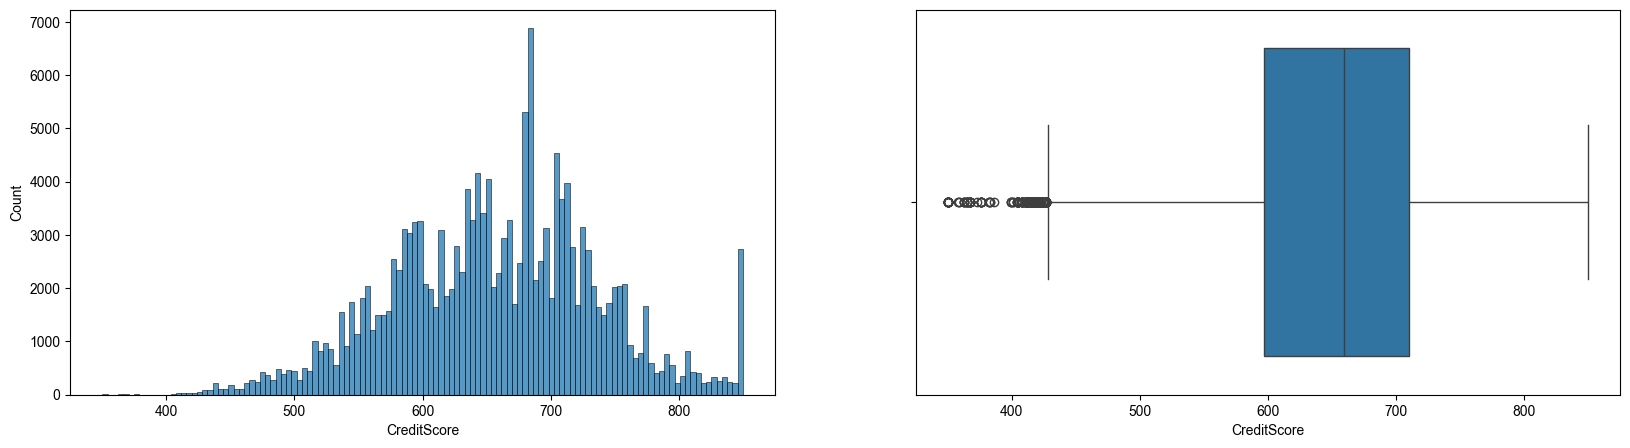

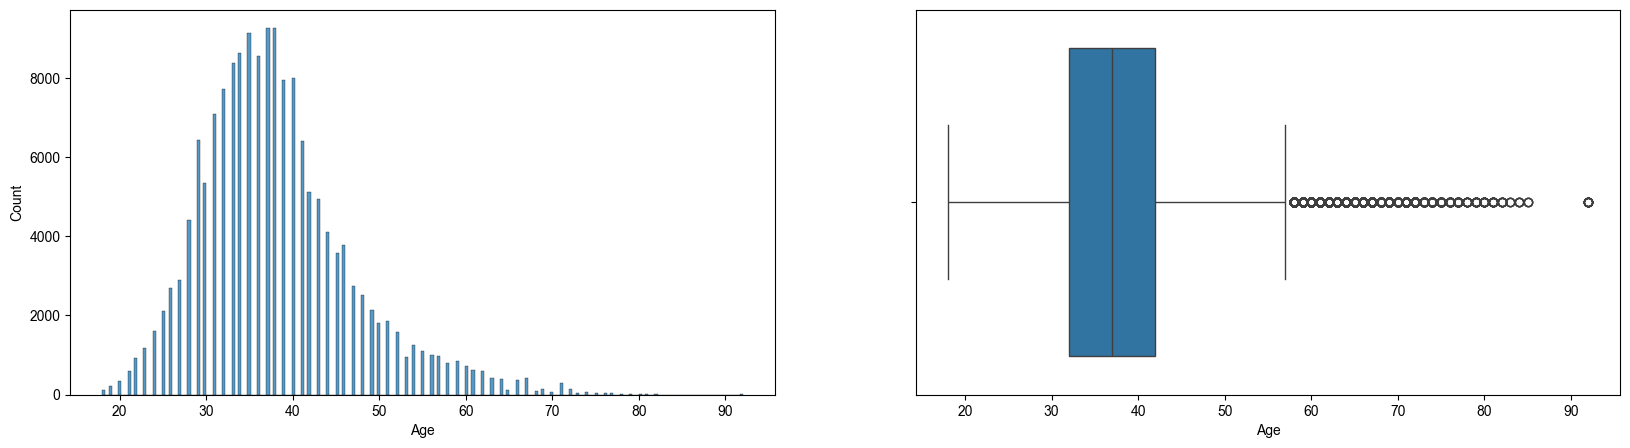

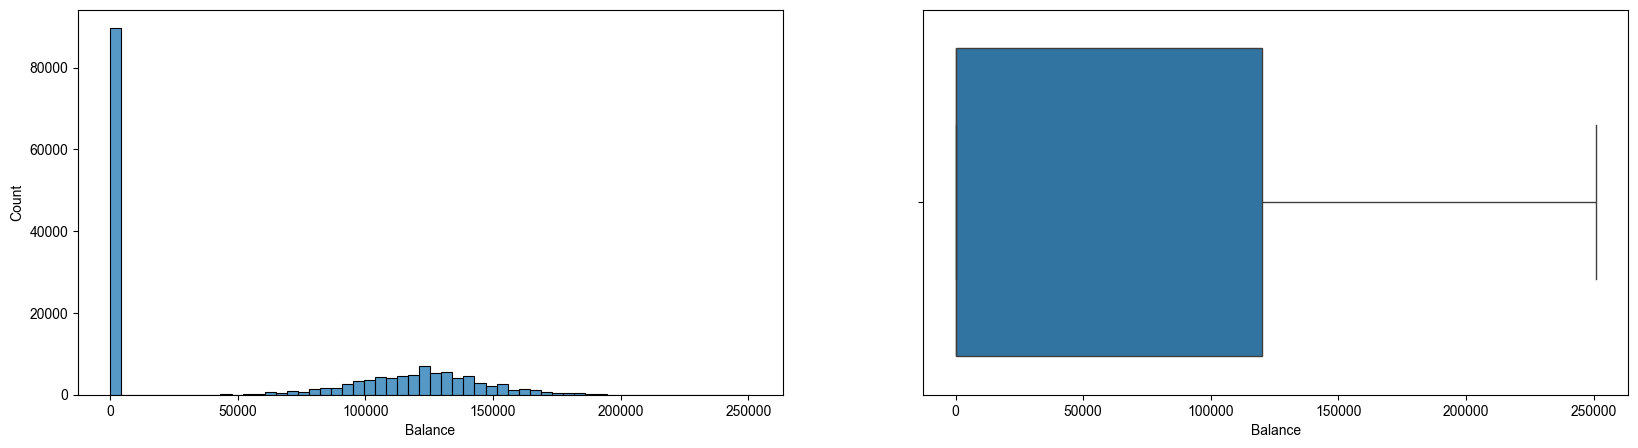

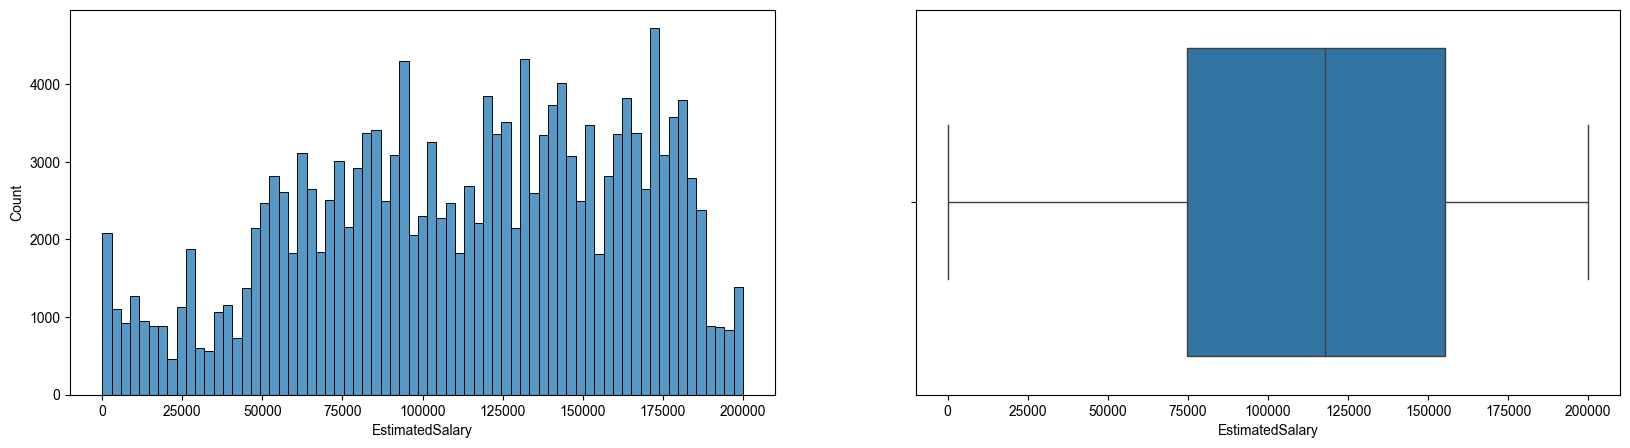

In [5]:
num_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.histplot(df_train[col], ax=ax[0])  
    sns.boxplot(x=df_train[col], ax=ax[1])
    plt.show()


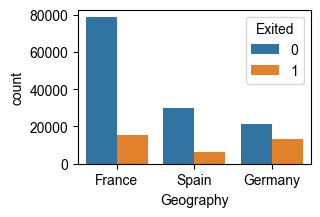

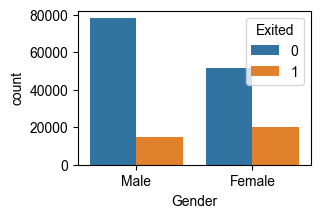

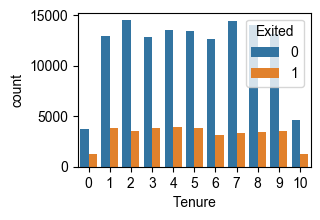

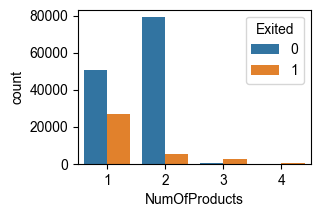

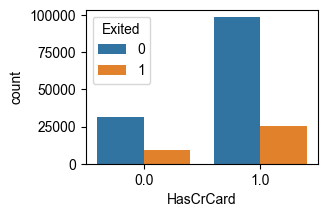

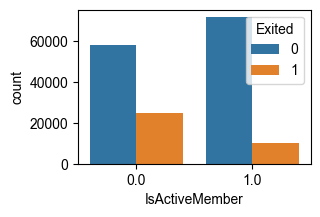

In [6]:
cat_col = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for feature in cat_col:
    if feature == "Exited":
        continue
    
    plt.subplots(figsize=(3, 2))
    sns.countplot(data=df_train, x=feature, hue='Exited')
    plt.show()

### 引入資料排除無法使用熱力圖的欄位

In [7]:
train = pd.read_csv("train.csv", index_col = 0)
train = train.drop(["CustomerId", "Surname"], axis = 1)
train_le = LabelEncoder()

for feature_s in ['Geography', 'Gender']:
    train[feature_s + 'Label'] = train_le.fit_transform(train[features])
train = train.drop(['Geography', 'Gender'], axis = 1)  ###一定要axis = 1 才會drop columns
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GeographyLabel,GenderLabel
id,,,,,,,,,,,
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,1


### 製作熱力圖

<Axes: >

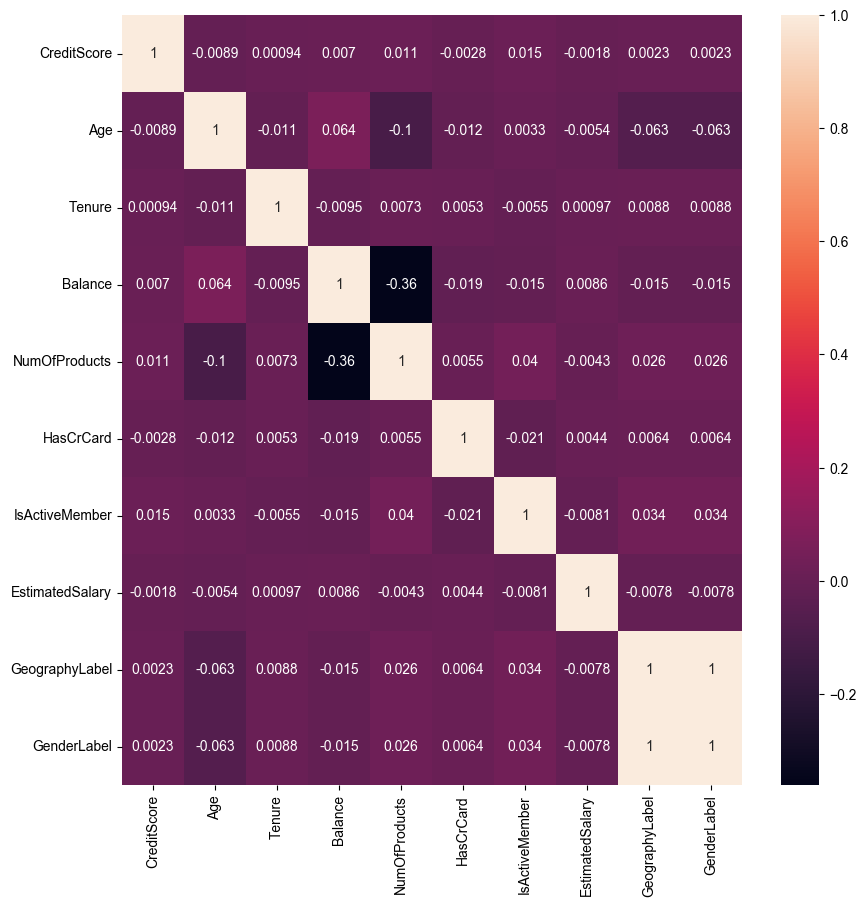

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(train.drop("Exited", axis=1).corr(), annot = True)  ####只能是int或float不可以是str

### 銀行測試集的留存率

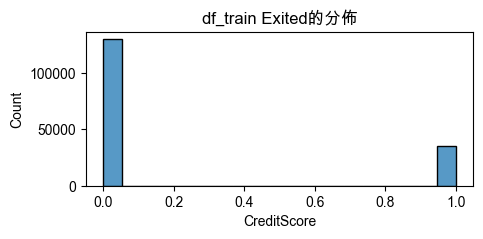

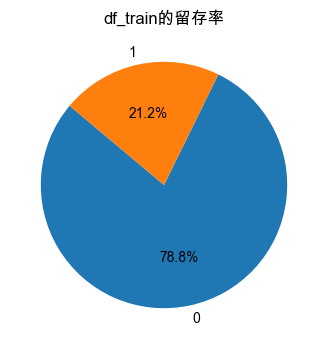

In [9]:
fig= plt.subplots(figsize=(5,2))
sns.histplot(df_train['Exited'])
plt.title('df_train Exited的分佈')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.show()

df_train_0 = df_train[df_train['Exited'] == 0]['Exited'].count()
df_train_1 = df_train[df_train['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([df_train_0, df_train_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('df_train的留存率')
plt.show()

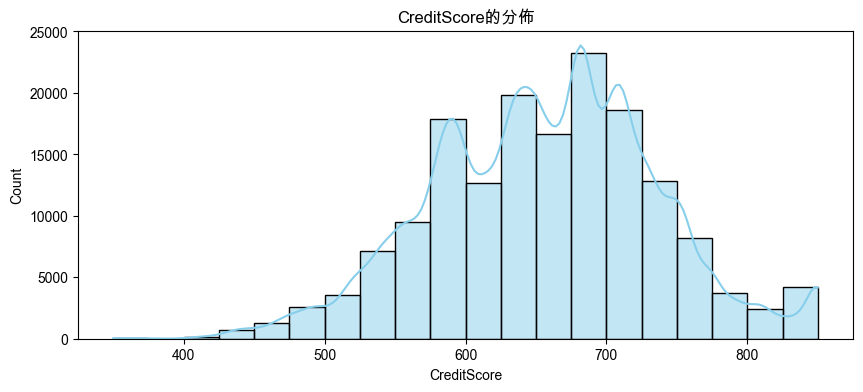

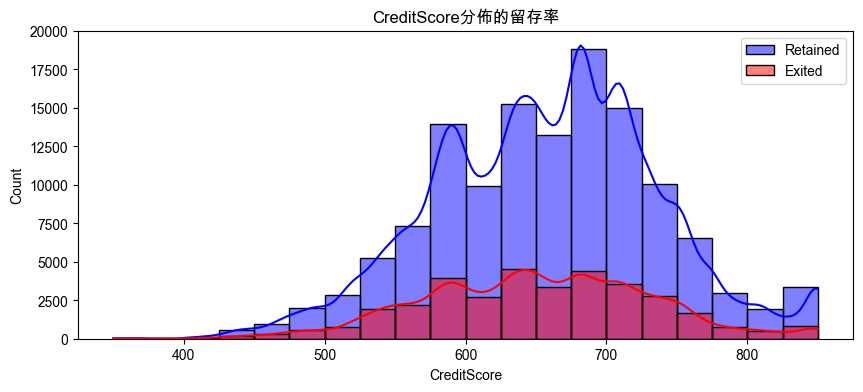

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(df_train['CreditScore'], bins=20, kde=True, color='skyblue')
plt.title('CreditScore的分佈')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df_train[df_train['Exited'] == 0]['CreditScore'], bins=20, kde=True, color='blue', label='Retained')
sns.histplot(df_train[df_train['Exited'] == 1]['CreditScore'], bins=20, kde=True, color='red', label='Exited')
plt.title('CreditScore分佈的留存率')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.legend()
plt.show()

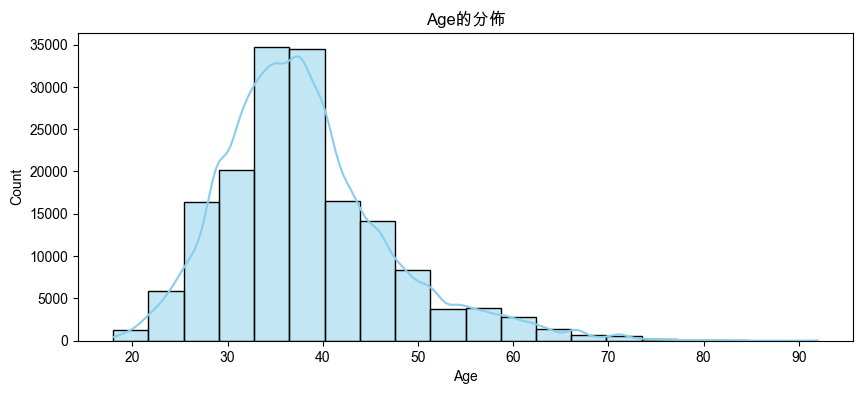

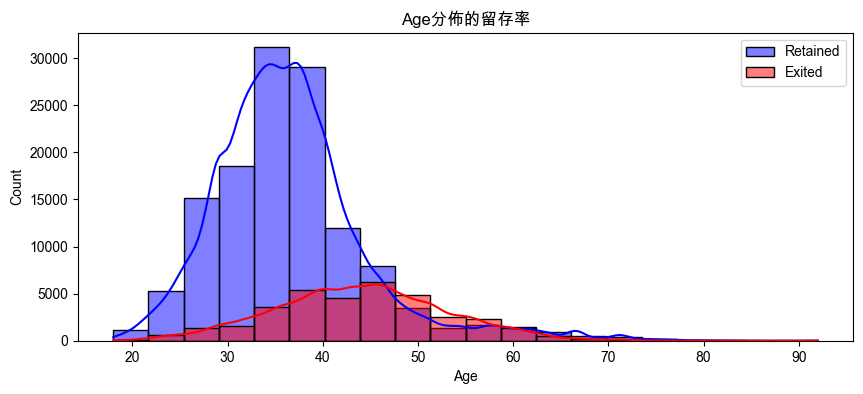

In [11]:
plt.figure(figsize=(10, 4))
sns.histplot(df_train['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age的分佈')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df_train[df_train['Exited'] == 0]['Age'], bins=20, kde=True, color='blue', label='Retained')
sns.histplot(df_train[df_train['Exited'] == 1]['Age'], bins=20, kde=True, color='red', label='Exited')
plt.title('Age分佈的留存率')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

- 35~50歲的離開率最高
- 50-59離開率比留下的高

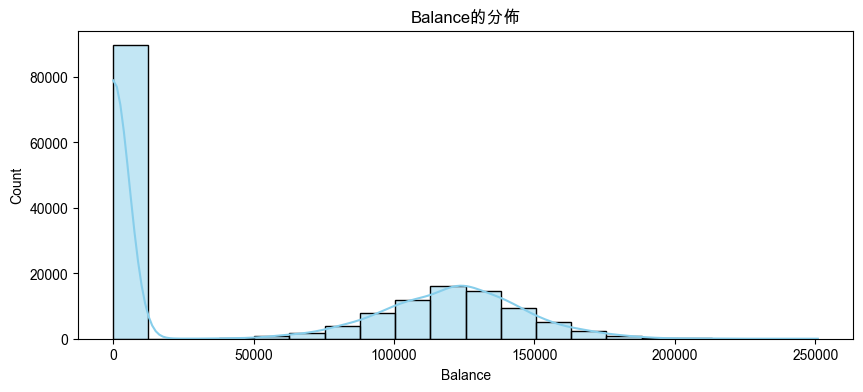

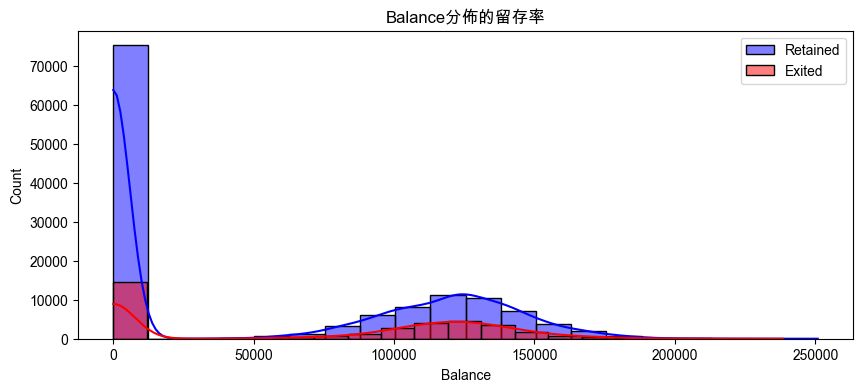

In [12]:
plt.figure(figsize=(10, 4))
sns.histplot(df_train['Balance'], bins=20, kde=True, color='skyblue')
plt.title('Balance的分佈')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df_train[df_train['Exited'] == 0]['Balance'], bins=20, kde=True, color='blue', label='Retained')
sns.histplot(df_train[df_train['Exited'] == 1]['Balance'], bins=20, kde=True, color='red', label='Exited')
plt.title('Balance分佈的留存率')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend()
plt.show()

- 需要特別關注銀行存款為0的客戶 觀察如果長期活躍度如果為0應該作為離群值忽略

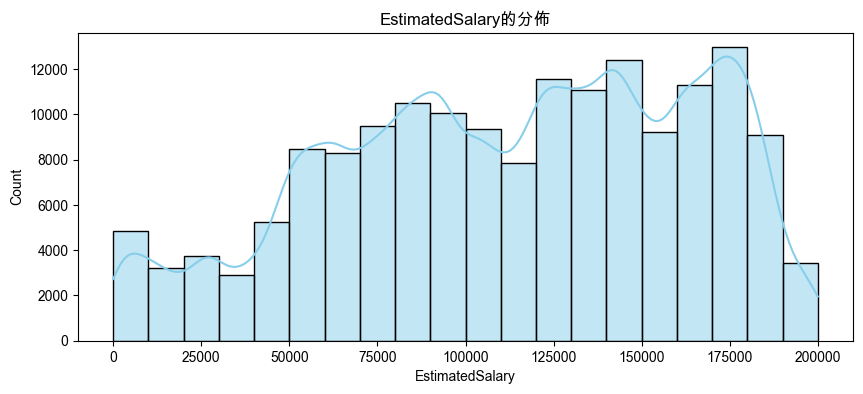

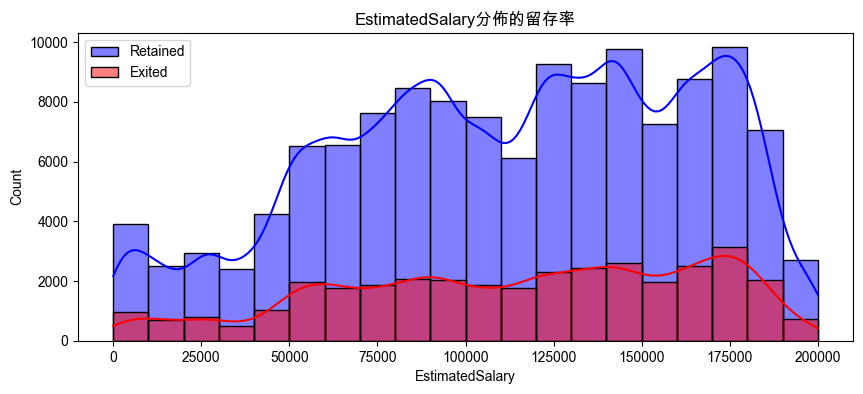

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(df_train['EstimatedSalary'], bins=20, kde=True, color='skyblue')
plt.title('EstimatedSalary的分佈')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df_train[df_train['Exited'] == 0]['EstimatedSalary'], bins=20, kde=True, color='blue', label='Retained')
sns.histplot(df_train[df_train['Exited'] == 1]['EstimatedSalary'], bins=20, kde=True, color='red', label='Exited')
plt.title('EstimatedSalary分佈的留存率')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.legend()
plt.show()

### CreditScore（信用評分）低於400的留存情況

        id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
169    169    15612494  Panicucci          359    France  Female  44.0   
2037  2037    15791533     Ch'ien          367     Spain  Female  35.0   
5633  5633    15651052   McMillan          399   Germany    Male  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
169        6  128747.69              1        0.0             1.0   
2037       6   93608.28              2        0.0             1.0   
5633       2  127655.22              2        1.0             1.0   

      EstimatedSalary  Exited  GeographyLabel  GenderLabel  
169         146955.71       0               0            0  
2037        168816.73       0               2            0  
5633        139994.68       0               1            1   56


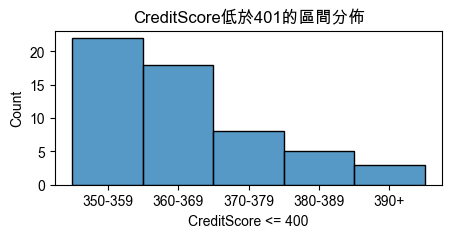

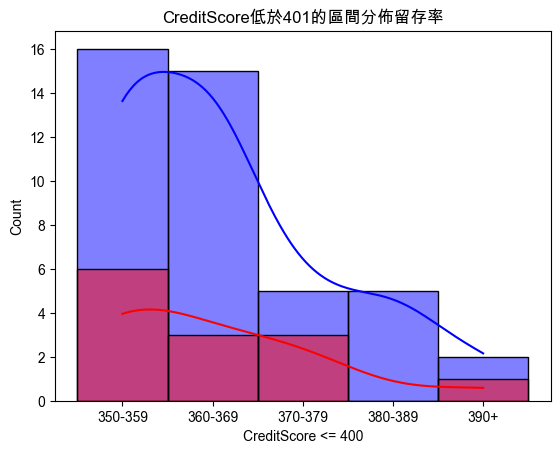

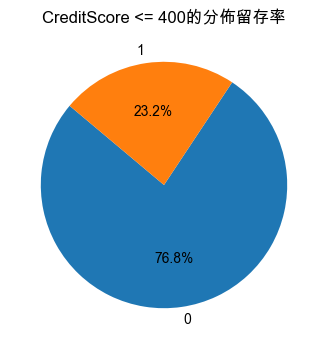

In [14]:
true_values_400 = df_train[df_train['CreditScore'] <= 400]

true_values_400_count = true_values_400.shape[0] 

print(true_values_400.head(3), true_values_400_count)
true_values_400_bins = [350,360,370,380,390,400]
true_values_400_labels = ['350-359','360-369','370-379','380-389','390+']

df_train['CreditScore_cut_under_401'] = pd.cut(true_values_400['CreditScore'], bins=true_values_400_bins, labels=true_values_400_labels, right=False)
# print(df_train['CreditScore_cut_under_401'].value_counts()['350-359'])

fig= plt.subplots( figsize=(5,2))
sns.histplot(df_train['CreditScore_cut_under_401'])
plt.title('CreditScore低於401的區間分佈')
plt.xlabel('CreditScore <= 400')
plt.ylabel('Count')
plt.show()

sns.histplot(df_train[df_train['Exited'] == 0]['CreditScore_cut_under_401'], bins=7, kde=True, color='blue', label='Retained')
sns.histplot(df_train[df_train['Exited'] == 1]['CreditScore_cut_under_401'], bins=7, kde=True, color='red', label='Exited')
plt.title('CreditScore低於401的區間分佈留存率')
plt.xlabel('CreditScore <= 400')
plt.ylabel('Count')
plt.show()


low_count_0 = true_values_400[true_values_400['Exited'] == 0]['Exited'].count()
low_count_1 = true_values_400[true_values_400['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([low_count_0, low_count_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('CreditScore <= 400的分佈留存率')
plt.show()

- 需要觀察小於400的活躍度、估計工資、年齡才能判斷是否為離群值
- 380-389基本沒有任何活動(如沒有活躍度基本就是離群值)

### 觀察高Balance（帳戶餘額）的留存率

   id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
3   3    15741417       Kao          581    France    Male  34.0       2   
5   5    15771669  Genovese          588   Germany    Male  36.0       4   
6   6    15692819    Ch'ang          593    France  Female  30.0       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
3  148882.54              1        1.0             1.0         84560.88   
5  131778.58              1        1.0             0.0        136024.31   
6  144772.69              1        1.0             0.0         29792.11   

   Exited  GeographyLabel  GenderLabel CreditScore_cut_under_401  
3       0               0            1                       NaN  
5       1               1            1                       NaN  
6       0               0            0                       NaN   75386


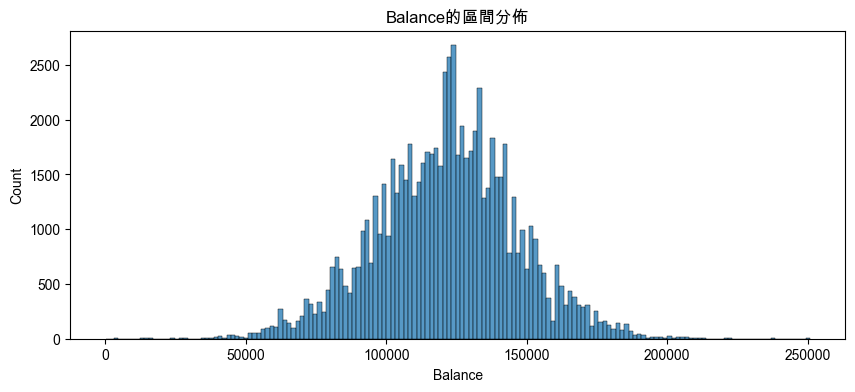

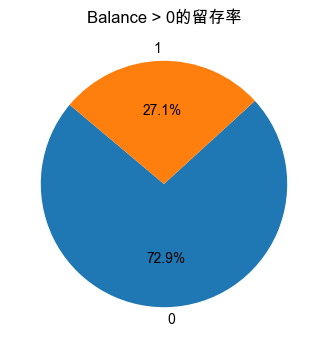

In [15]:
balance_bigger_0= df_train[df_train['Balance'] > 0]
print(balance_bigger_0.head(3),balance_bigger_0['Balance'].count())

fig= plt.subplots(figsize=(10,4))
sns.histplot(balance_bigger_0['Balance'])
plt.title('Balance的區間分佈')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

bigger_count_0_0 = balance_bigger_0[balance_bigger_0['Exited'] == 0]['Exited'].count()
bigger_count_1_0 = balance_bigger_0[balance_bigger_0['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([bigger_count_0_0, bigger_count_1_0], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('Balance > 0的留存率')
plt.show()


        id  CustomerId     Surname  CreditScore Geography  Gender   Age  \
3894  3894    15775108  Napolitano          564    France    Male  42.0   
3968  3968    15768451        Nott          681    France  Female  40.0   
5031  5031    15690540     Udinesi          532    France    Male  40.0   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
3894      10  200724.96              1        1.0             0.0   
3968       8  222267.63              1        1.0             0.0   
5031       9  212314.03              1        1.0             1.0   

      EstimatedSalary  Exited  GeographyLabel  GenderLabel  \
3894         82872.64       1               0            1   
3968        186281.00       1               0            0   
5031        148814.54       0               0            1   

     CreditScore_cut_under_401  
3894                       NaN  
3968                       NaN  
5031                       NaN   132


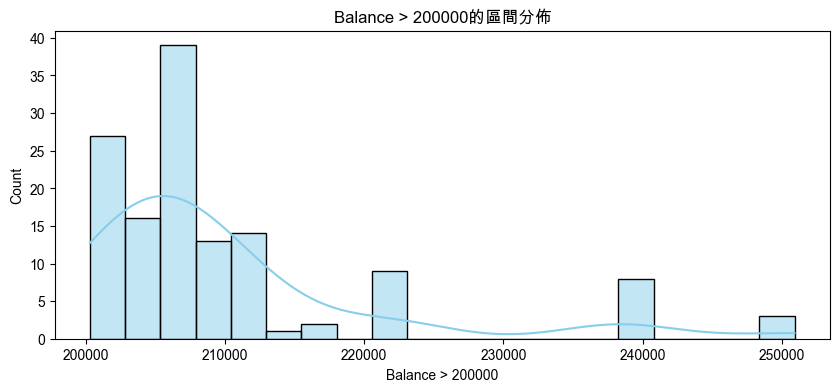

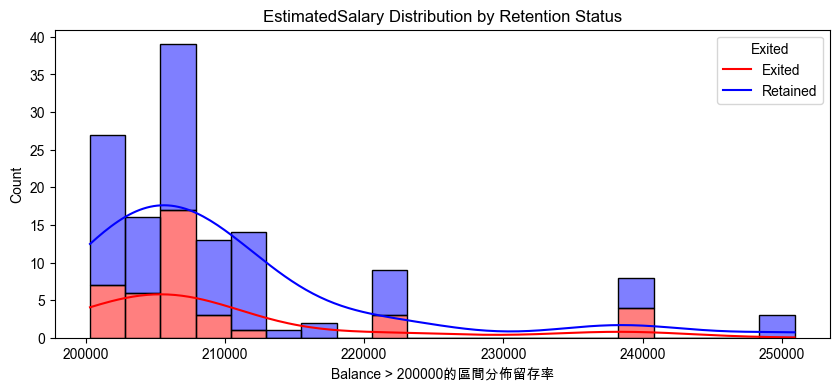

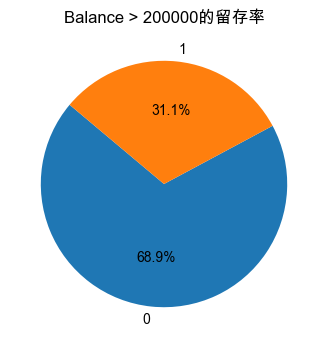

In [16]:
balance_bigger_200000= df_train[df_train['Balance'] > 200000]
print(balance_bigger_200000.head(3),balance_bigger_200000['Balance'].count())

plt.figure(figsize=(10, 4))
sns.histplot(balance_bigger_200000['Balance'], bins=20, kde=True, color='skyblue')
plt.title('Balance > 200000的區間分佈')
plt.xlabel('Balance > 200000')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(data=balance_bigger_200000, x='Balance', bins=20, kde=True, hue='Exited', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.title('EstimatedSalary Distribution by Retention Status')
plt.xlabel('Balance > 200000的區間分佈留存率')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Exited','Retained'])
plt.show()

bigger_200000_count_0 = balance_bigger_200000[balance_bigger_200000['Exited'] == 0]['Exited'].count()
bigger_200000_count_1 = balance_bigger_200000[balance_bigger_200000['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([bigger_200000_count_0, bigger_200000_count_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('Balance > 200000的留存率')
plt.show()

### 高預估工資留存率怎麼會這麼高很奇怪

   id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
3   3    15741417       Kao          581    France    Male  34.0       2   
5   5    15771669  Genovese          588   Germany    Male  36.0       4   
6   6    15692819    Ch'ang          593    France  Female  30.0       8   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
3  148882.54              1        1.0             1.0         84560.88   
5  131778.58              1        1.0             0.0        136024.31   
6  144772.69              1        1.0             0.0         29792.11   

   Exited  GeographyLabel  GenderLabel CreditScore_cut_under_401  
3       0               0            1                       NaN  
5       1               1            1                       NaN  
6       0               0            0                       NaN   75049


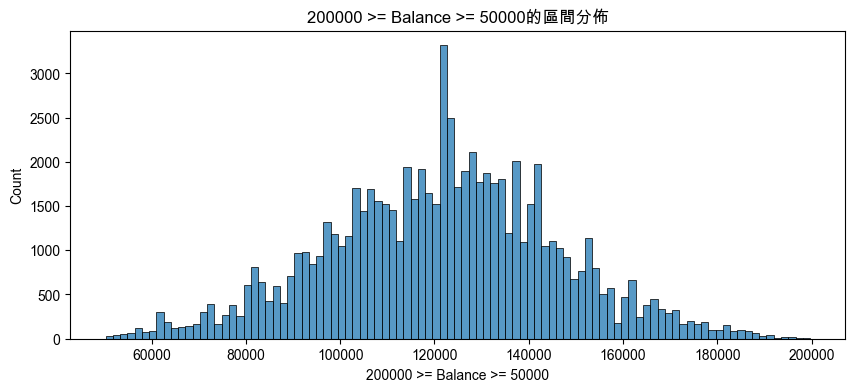

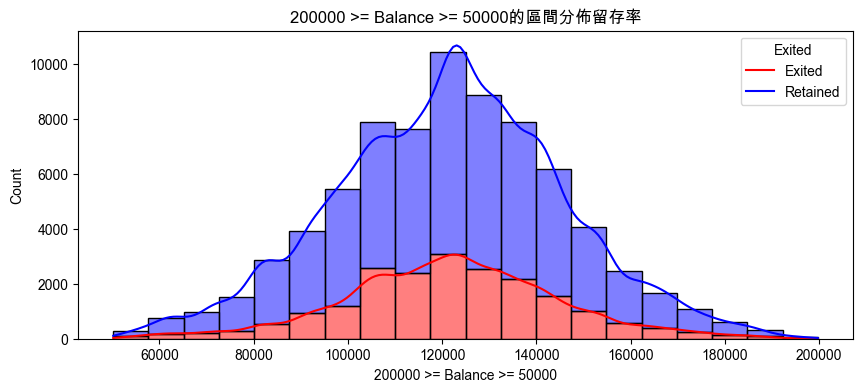

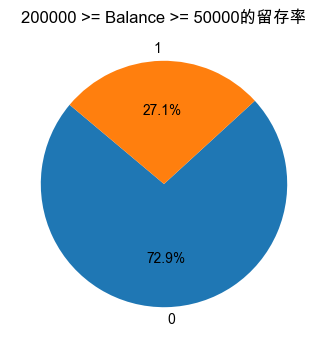

In [17]:
balance_lower_200000_bigger_50000= df_train[(df_train['Balance'] >= 50000) &(df_train['Balance'] <= 200000)]
print(balance_lower_200000_bigger_50000.head(3),balance_lower_200000_bigger_50000['Balance'].count())

fig= plt.subplots(figsize=(10,4))
sns.histplot(balance_lower_200000_bigger_50000['Balance'])
plt.title('200000 >= Balance >= 50000的區間分佈')
plt.xlabel('200000 >= Balance >= 50000')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(balance_lower_200000_bigger_50000, x='Balance', bins=20, kde=True, hue='Exited', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.title('200000 >= Balance >= 50000的區間分佈留存率')
plt.xlabel('200000 >= Balance >= 50000')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Exited','Retained'])
plt.show()

balance_lower_200000_bigger_50000_0 = balance_lower_200000_bigger_50000[balance_lower_200000_bigger_50000['Exited'] == 0]['Exited'].count()
balance_lower_200000_bigger_50000_1 = balance_lower_200000_bigger_50000[balance_lower_200000_bigger_50000['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([balance_lower_200000_bigger_50000_0, balance_lower_200000_bigger_50000_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('200000 >= Balance >= 50000的留存率')
plt.show()

        id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
528    528    15742404  Calabresi          743   Germany    Male  38.0   
2886  2886    15660147       Dore          493     Spain    Male  32.0   
4248  4248    15702541    Mironov          724   Germany  Female  29.0   

      Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
528        5  38848.19              2        1.0             0.0   
2886       8  46161.18              2        1.0             1.0   
4248       7  13898.30              1        0.0             0.0   

      EstimatedSalary  Exited  GeographyLabel  GenderLabel  \
528          38308.34       0               1            1   
2886         79577.40       0               2            1   
4248        189678.70       0               1            0   

     CreditScore_cut_under_401  
528                        NaN  
2886                       NaN  
4248                       NaN   205


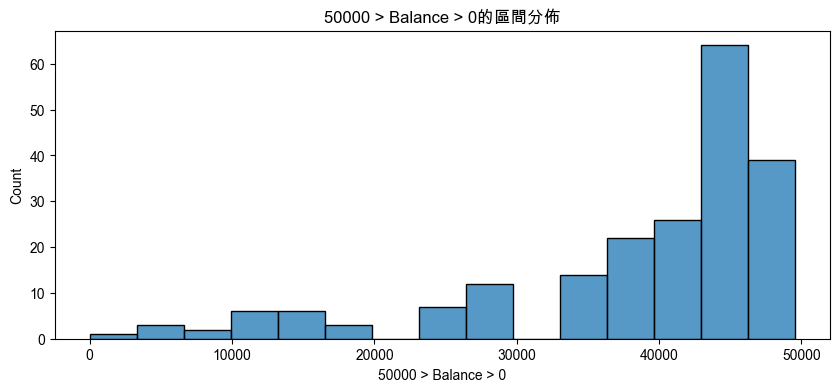

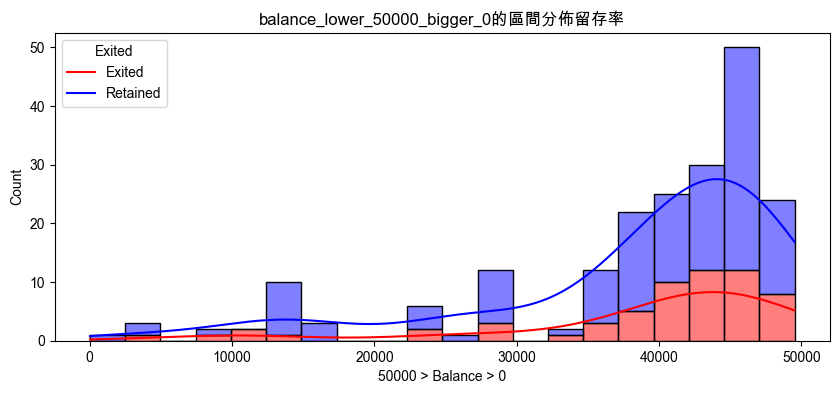

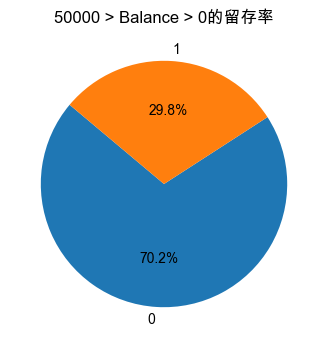

In [18]:
balance_lower_50000_bigger_0= df_train[(df_train['Balance'] < 50000) &(df_train['Balance'] > 0)]
print(balance_lower_50000_bigger_0.head(3),balance_lower_50000_bigger_0['Balance'].count())

fig= plt.subplots(figsize=(10,4))
sns.histplot(balance_lower_50000_bigger_0['Balance'])
plt.title('50000 > Balance > 0的區間分佈')
plt.xlabel('50000 > Balance > 0')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(balance_lower_50000_bigger_0, x='Balance', bins=20, kde=True, hue='Exited', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.title('balance_lower_50000_bigger_0的區間分佈留存率')
plt.xlabel('50000 > Balance > 0')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Exited','Retained'])
plt.show()

balance_lower_50000_bigger_0_0 = balance_lower_50000_bigger_0[balance_lower_50000_bigger_0['Exited'] == 0]['Exited'].count()
balance_lower_50000_bigger_0_1 = balance_lower_50000_bigger_0[balance_lower_50000_bigger_0['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([balance_lower_50000_bigger_0_0, balance_lower_50000_bigger_0_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('50000 > Balance > 0的留存率')
plt.show()

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0      0.0              2        1.0             0.0        181449.97       0   
1      0.0              2        1.0             1.0         49503.50       0   
2      0.0              2        1.0             0.0        184866.69       0   

   GeographyLabel  GenderLabel CreditScore_cut_under_401  
0               0            1                       NaN  
1               0            1                       NaN  
2               0            1                       NaN   89648


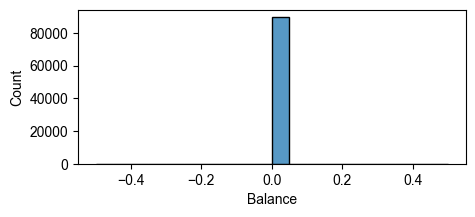

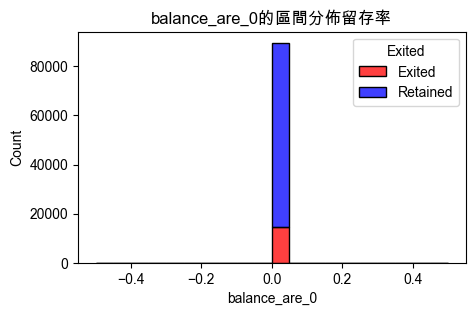

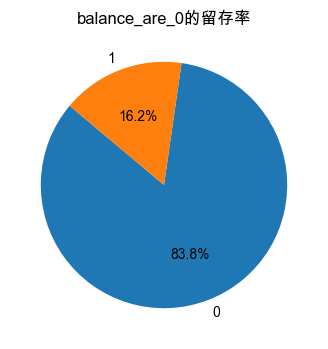

In [19]:
balance_are_0 = df_train[df_train['Balance'] == 0]
print(balance_are_0.head(3),balance_are_0['Balance'].count())

fig= plt.subplots(figsize=(5,2))
sns.histplot(balance_are_0['Balance'], bins=20)
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(data=balance_are_0, x='Balance', bins=20, hue='Exited', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.title('balance_are_0的區間分佈留存率')
plt.title('balance_are_0的區間分佈留存率')
plt.xlabel('balance_are_0')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Exited','Retained'])
plt.show()


balance_are_0_0 = balance_are_0[balance_are_0['Exited'] == 0]['Exited'].count()
balance_are_0_1 = balance_are_0[balance_are_0['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([balance_are_0_0, balance_are_0_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('balance_are_0的留存率')
plt.show()

- 帳戶餘額總離開率為27.1%
- 帳戶餘額高大於200000的離開率為31.1%和區間在49999~1的離開率為29.8%都比較高，可特別去觀察這個部分還有哪些特徵讓離開率高
- 帳戶餘額在50000~200000的離開率為27.1%屬於常態分佈，數據可性度高
- 帳戶餘額0離開率為16.2%偏低，需要去觀察帳戶活耀度，如無活耀度應視為離群值作為排除

#### 估計工資低於25000的人是誰是否需要排除

    id  CustomerId    Surname  CreditScore Geography Gender   Age  Tenure  \
4    4    15766172  Chiemenam          716     Spain   Male  33.0       5   
11  11    15674671       Chiu          687   Germany   Male  40.0       3   
37  37    15761718   Lucchesi          752    France   Male  37.0       6   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
4       0.00              2        1.0             1.0         15068.83   
11  90432.92              1        1.0             0.0          1676.92   
37      0.00              2        0.0             0.0          1187.88   

    Exited  GeographyLabel  GenderLabel CreditScore_cut_under_401  
4        0               2            1                       NaN  
11       0               1            1                       NaN  
37       0               0            1                       NaN   9183
id                                  4
CustomerId                   15565806
Surname                        Abbott

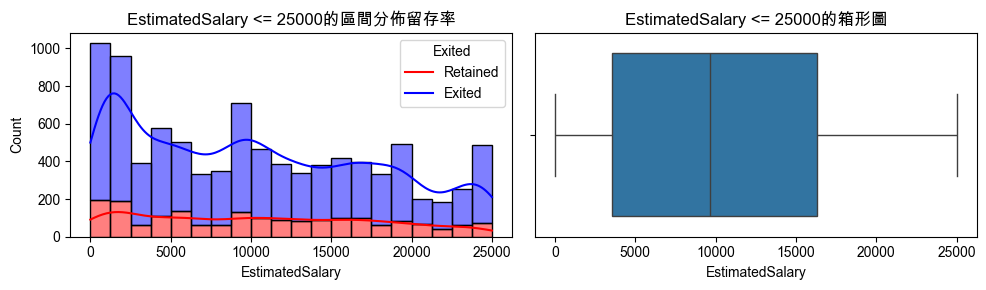

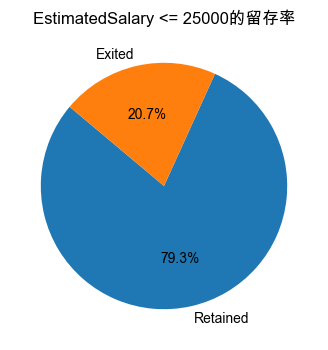

In [20]:
EstimatedSalary_lower_25000 = df_train.loc[df_train['EstimatedSalary'] <= 25000]
print(EstimatedSalary_lower_25000.head(3),EstimatedSalary_lower_25000['EstimatedSalary'].count())
print(EstimatedSalary_lower_25000.min())

num_col = ['EstimatedSalary']
for col2 in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(data=EstimatedSalary_lower_25000, ax=ax[0], x=col2, bins=20, kde=True, hue='Exited', palette={0: 'blue', 1: 'red'}, multiple='stack')
    ax[0].set_title('EstimatedSalary <= 25000的區間分佈留存率')
    ax[0].set_xlabel('EstimatedSalary')
    ax[0].set_ylabel('Count')
    ax[0].legend(title='Exited', labels=['Retained', 'Exited'])
    
    sns.boxplot(data=EstimatedSalary_lower_25000, x=col2, ax=ax[1])
    ax[1].set_title('EstimatedSalary <= 25000的箱形圖')
    plt.tight_layout()
    plt.show()
    
EstimatedSalary_25000_rows_0 = EstimatedSalary_lower_25000[EstimatedSalary_lower_25000['Exited'] == 0]['Exited'].count()
EstimatedSalary_25000_rows_1 = EstimatedSalary_lower_25000[EstimatedSalary_lower_25000['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([EstimatedSalary_25000_rows_0, EstimatedSalary_25000_rows_1], autopct='%1.1f%%', labels=['Retained', 'Exited'], startangle=140)
plt.title('EstimatedSalary <= 25000的留存率')
plt.show()


#### 想知道工資低於25000的人離開率會不會比較高 因為工資低、存款少、年輕通常與銀行的黏著度也會相對低
- 但從數據上顯示並沒有明顯的離群值需要被排除（但穩定性如果不夠容易造成資料的誤判）

      id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
11    11    15674671      Chiu          687   Germany    Male  40.0       3   
37    37    15761718  Lucchesi          752    France    Male  37.0       6   
163  163    15572038      Tien          706    France  Female  38.0       7   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
11   90432.92              1        1.0             0.0          1676.92   
37       0.00              2        0.0             0.0          1187.88   
163      0.00              2        0.0             0.0           933.38   

     Exited  GeographyLabel  GenderLabel CreditScore_cut_under_401  
11        0               1            1                       NaN  
37        0               0            1                       NaN  
163       0               0            0                       NaN   1805


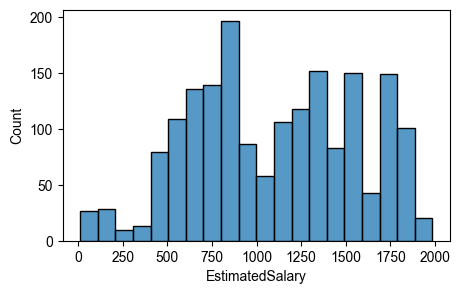

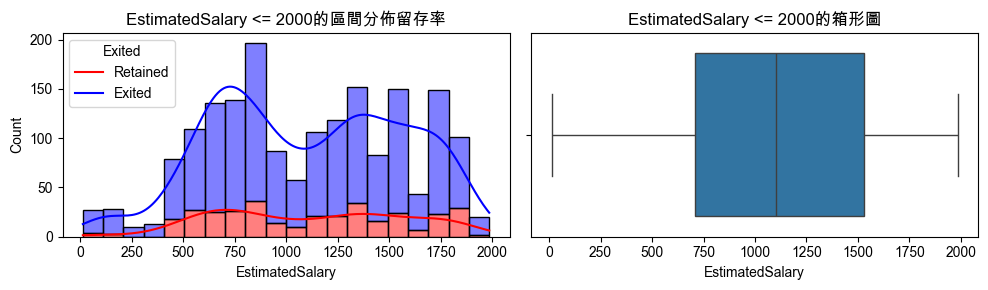

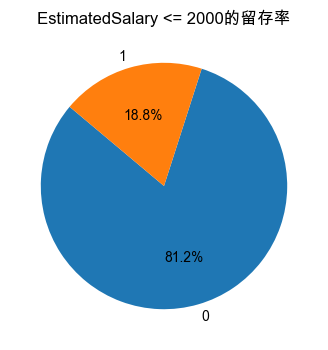

In [21]:
EstimatedSalary_lower_2000 = df_train.loc[df_train['EstimatedSalary'] <= 2000]
print(EstimatedSalary_lower_2000.head(3),EstimatedSalary_lower_2000['EstimatedSalary'].count())
EstimatedSalary_lower_2000.min()

fig = plt.subplots(figsize=(5, 3))
sns.histplot(EstimatedSalary_lower_2000['EstimatedSalary'],bins=20) 
plt.show()  

num_col2 = ['EstimatedSalary']
for col2 in num_col2:
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(EstimatedSalary_lower_2000, ax=ax[0], x=col2, bins=20, kde=True, hue='Exited', palette={0: 'blue', 1: 'red'}, multiple='stack') 
    ax[0].set_title('EstimatedSalary <= 2000的區間分佈留存率')
    ax[0].set_xlabel('EstimatedSalary')
    ax[0].set_ylabel('Count')
    ax[0].legend(title='Exited', labels=['Retained', 'Exited'])
    sns.boxplot(data=EstimatedSalary_lower_2000, x=col2, ax=ax[1])
    ax[1].set_title('EstimatedSalary <= 2000的箱形圖')
    plt.tight_layout()
    plt.show()

EstimatedSalary_lower_2000_0 = EstimatedSalary_lower_2000[EstimatedSalary_lower_2000['Exited'] == 0]['Exited'].count()
EstimatedSalary_lower_2000_1 = EstimatedSalary_lower_2000[EstimatedSalary_lower_2000['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([EstimatedSalary_lower_2000_0, EstimatedSalary_lower_2000_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('EstimatedSalary <= 2000的留存率')
plt.show()




- 發現工資低於2000的離開率更低，帳戶餘額為0的離開率也低，但帳戶餘額大於0的離開率高，此時會想知道工資低於2000的顧客在銀行的活耀度，用來判斷是否應該被納入統計，因為有可能他們根本沒有在使用銀行的任何功能，對分析結論沒有幫助而影響資料的判讀

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0      0.0              2        1.0             0.0        181449.97       0   
1      0.0              2        1.0             1.0         49503.50       0   
2      0.0              2        1.0             0.0        184866.69       0   

   GeographyLabel  GenderLabel CreditScore_cut_under_401  
0               0            1                       NaN  
1               0            1                       NaN  
2               0            1                       NaN   160292


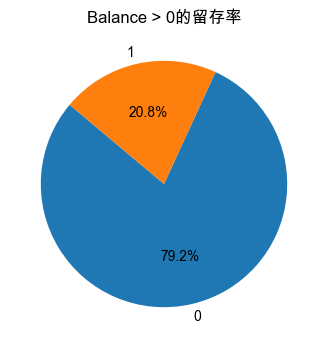

In [22]:
age_bigger_60= df_train[df_train['Age'] < 60]
print(age_bigger_60.head(3),age_bigger_60['Age'].count())

age_bigger_60_0 = age_bigger_60[age_bigger_60['Exited'] == 0]['Exited'].count()
age_bigger_60_1 = age_bigger_60[age_bigger_60['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([age_bigger_60_0, age_bigger_60_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('Balance > 0的留存率')
plt.show()

    id  CustomerId   Surname  CreditScore Geography Gender   Age  Tenure  \
12  12    15717962     Rossi          759     Spain   Male  71.0       9   
19  19    15650670     Ts'ui          559    France   Male  61.0       1   
84  84    15777797  Nnaemeka          637     Spain   Male  64.0       1   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
12       0.00              1        1.0             1.0         93081.87   
19  153711.26              1        0.0             1.0        180890.40   
84       0.00              1        0.0             1.0        181490.42   

    Exited  GeographyLabel  GenderLabel CreditScore_cut_under_401  
12       0               2            1                       NaN  
19       1               0            1                       NaN  
84       0               2            1                       NaN   4016


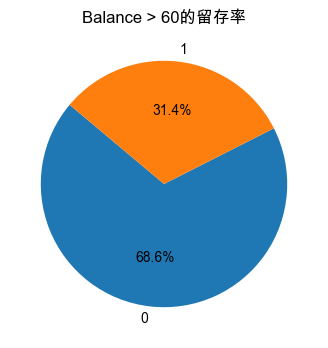

In [23]:
true_values_balance_0= df_train[df_train['Age'] > 60]
print(true_values_balance_0.head(3),true_values_balance_0['Age'].count())

low_count_0_0 = true_values_balance_0[true_values_balance_0['Exited'] == 0]['Exited'].count()
low_count_1_0 = true_values_balance_0[true_values_balance_0['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([low_count_0_0, low_count_1_0], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('Balance > 60的留存率')
plt.show()

- 發現年齡大於60的離開率有31.4%

### 從長條圖發現德國流失的比例比其他國家高

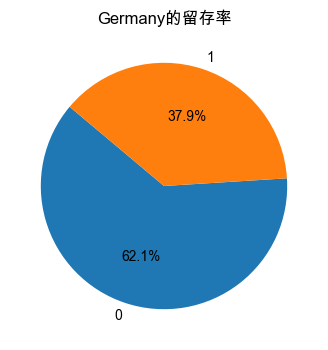

id                           16388
CustomerId                   16388
Surname                      16388
CreditScore                  16388
Geography                    16388
Gender                       16388
Age                          16388
Tenure                       16388
Balance                      16388
NumOfProducts                16388
HasCrCard                    16388
IsActiveMember               16388
EstimatedSalary              16388
Exited                       16388
GeographyLabel               16388
GenderLabel                  16388
CreditScore_cut_under_401        7
dtype: int64


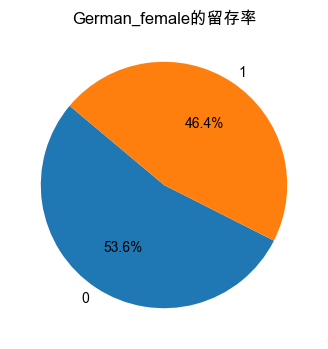

In [24]:
germany_rows = df_train.loc[df_train['Geography'] == 'Germany']

germany_rows_exited_0 = germany_rows[germany_rows['Exited'] == 0]['Exited'].count()
germany_rows_exited_1 = germany_rows[germany_rows['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([germany_rows_exited_0, germany_rows_exited_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('Germany的留存率')
plt.show()
germany_female_rows = germany_rows.loc[germany_rows['Gender'] == 'Female']
# print(germany_female_rows)
print(germany_female_rows.count())
germany_female_rows_exited_0 = germany_female_rows[germany_female_rows['Exited'] == 0]['Exited'].count()
germany_female_rows_exited_1 = germany_female_rows[germany_female_rows['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([germany_female_rows_exited_0, germany_female_rows_exited_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('German_female的留存率')
plt.show()
# plt.rcParams['font.sans-serif']=['Arial Vnicode Ms']

- 1.德國女性的流失率比較高
- 2.帳戶餘額較多的離開機率都稍微比其他高

        id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
247    247    15777067    Thomas          646   Germany  Female  64.0       8   
1465  1465    15585961      Hsia          598   Germany  Female  68.0       7   
2222  2222    15766272  Folliero          677   Germany  Female  61.0       8   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
247   160858.13              1        1.0             0.0         61936.22   
1465  133845.01              1        1.0             1.0        183568.01   
2222  109166.37              1        1.0             1.0         92840.67   

      Exited  GeographyLabel  GenderLabel CreditScore_cut_under_401  
247        1               1            0                       NaN  
1465       1               1            0                       NaN  
2222       0               1            0                       NaN   id                           441
CustomerId                   441
Surname         

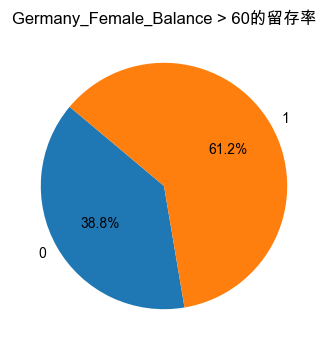

In [25]:
germany_rows = df_train.loc[df_train['Geography'] == 'Germany']

germany_female_rows = germany_rows.loc[germany_rows['Gender'] == 'Female']

germany_female_rows_age_bigger_60= germany_female_rows.loc[germany_female_rows['Age'] > 60]
print(germany_female_rows_age_bigger_60.head(3),germany_female_rows_age_bigger_60.count())

germany_female_rows_age_bigger_60_0 = germany_female_rows_age_bigger_60[germany_female_rows_age_bigger_60['Exited'] == 0]['Exited'].count()
germany_female_rows_age_bigger_60_1 = germany_female_rows_age_bigger_60[germany_female_rows_age_bigger_60['Exited'] == 1]['Exited'].count()

plt.figure(figsize=(4, 4))
plt.pie([germany_female_rows_age_bigger_60_0, germany_female_rows_age_bigger_60_1], autopct='%1.1f%%',labels=[0, 1], startangle=140) #####這裡labels如何指定名字
plt.title('Germany_Female_Balance > 60的留存率')
plt.show()

- 發現德國女性年齡大於60歲的離開率高達61.2% 德國女性年齡大於60歲的人共有441人

### 尋找合適的分類模型

In [26]:
import warnings
warnings.filterwarnings("ignore")


# models
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'NaiveBayes': GaussianNB(),
    'LDA': LDA(),
    'kNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(random_state=42)
}

model_scores = {}

# Perform grid search for selected models
for model_name, model in models.items():    
    model.fit(x_train, y_train)
  
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of positive class
    auc_score = roc_auc_score(y_test, y_pred_proba)
    model_scores[model_name] = auc_score

    print(f"Test AUC for {model_name}:", auc_score)
    print()

Test AUC for LogisticRegression: 0.71282009639294

Test AUC for NaiveBayes: 0.7684547105141049

Test AUC for LDA: 0.808339363577975

Test AUC for kNN: 0.569471584806501

Test AUC for DecisionTree: 0.7034886579503394

Test AUC for RandomForest: 0.8729542620457208

Test AUC for AdaBoost: 0.8799341956309444

Test AUC for GradientBoosting: 0.8881800398369679



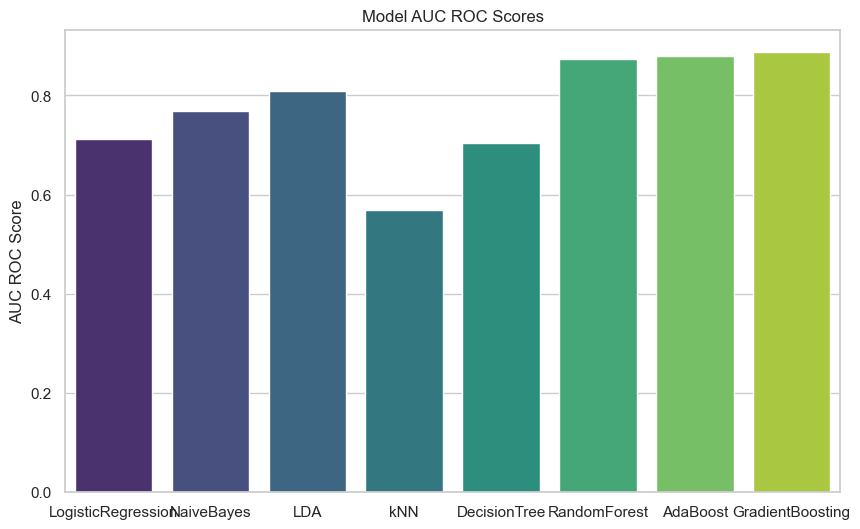

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")
plt.title('Model AUC ROC Scores')
plt.ylabel('AUC ROC Score')
plt.show()

#### 選擇GradientBoosting模型作為評估的模型

In [28]:
gdbt_classifer = GradientBoostingClassifier(random_state=42)

gdbt_classifer.fit(x_train,y_train)

predictions = gdbt_classifer.predict(df_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'GeographyLabel', 'GenderLabel']])
y_pred = gdbt_classifer.predict(x_test)
classification_rep = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_rep)

output = pd.DataFrame({'id': df_test['id'], 'Exited': predictions})
print(output)
output.to_csv('submission_bank_tuning24.csv', index=False)
print("Your submission was successfully saved!")

0.8646563389953748
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     39133
           1       0.75      0.53      0.62     10378

    accuracy                           0.86     49511
   macro avg       0.82      0.74      0.77     49511
weighted avg       0.86      0.86      0.86     49511

            id  Exited
0       165034       0
1       165035       1
2       165036       0
3       165037       0
4       165038       0
...        ...     ...
110018  275052       0
110019  275053       0
110020  275054       0
110021  275055       0
110022  275056       0

[110023 rows x 2 columns]
Your submission was successfully saved!


### 排除CreditScore的離群值

In [29]:
df_train_drop_upper_under = df_train[~(df_train['CreditScore_cut_under_401'] == '350-359')]

# 检查删除后的数据集的行数
print(df_train_drop_upper_under.shape)
print(df_train.shape)
print(df_train_drop_upper_under.head(3))


(165012, 17)
(165034, 17)
   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0      0.0              2        1.0             0.0        181449.97       0   
1      0.0              2        1.0             1.0         49503.50       0   
2      0.0              2        1.0             0.0        184866.69       0   

   GeographyLabel  GenderLabel CreditScore_cut_under_401  
0               0            1                       NaN  
1               0            1                       NaN  
2               0            1                       NaN  


In [30]:
df_train_drop_upper_under = df_train[~(df_train['CreditScore_cut_under_401'] == '350-359')]
train_feature_drop_upper_under = df_train_drop_upper_under[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','GeographyLabel','GenderLabel']]
train_label_drop_upper_under =df_train_drop_upper_under['Exited']
x_train2, x_test2, y_train2, y_test2 = train_test_split(train_feature_drop_upper_under, train_label_drop_upper_under, test_size=0.3, random_state=42)

gdbt_classifer2 = GradientBoostingClassifier(random_state=42)

gdbt_classifer2.fit(x_train2,y_train2)

predictions2 = gdbt_classifer2.predict(df_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'GeographyLabel', 'GenderLabel']])

y_pred2 = gdbt_classifer2.predict(x_test2)
classification_rep2 = classification_report(y_test2, y_pred2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print(accuracy2)
print(classification_rep2)

output = pd.DataFrame({'id': df_test.index, 'Exited': predictions2})
print(output)
output.to_csv('submission_bank_tuning25.csv', index=False)
print("Your submission was successfully saved!")

0.8609001292824823
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     38867
           1       0.76      0.51      0.61     10637

    accuracy                           0.86     49504
   macro avg       0.82      0.74      0.76     49504
weighted avg       0.85      0.86      0.85     49504

            id  Exited
0            0       0
1            1       1
2            2       0
3            3       0
4            4       0
...        ...     ...
110018  110018       0
110019  110019       0
110020  110020       0
110021  110021       0
110022  110022       0

[110023 rows x 2 columns]
Your submission was successfully saved!


### 結論
#### 排除CreditScore的離群值前
- 0.8646563389953748
-               precision    recall  f1-score   support

-            0       0.88      0.95      0.92     39133
-            1       0.75      0.53      0.62     10378

-     accuracy                           0.86     49511
-    macro avg       0.82      0.74      0.77     49511
- weighted avg       0.86      0.86      0.86     49511

#### 排除CreditScore的離群值後
- 0.8640782685548681
-               precision    recall  f1-score   support

-            0       0.88      0.95      0.92     38324
-            1       0.76      0.53      0.62     10329

-     accuracy                           0.86     48653
-    macro avg       0.82      0.74      0.77     48653
- weighted avg       0.86      0.86      0.85     48653

##### 排除CreditScore大於845小於400的資料與精準度無相關